## Our aim to understand the financial conditions of company fundraising goals.



# Objective:
### The objective of the project is to predict whether a startup which is currently Operating, IPO, Acquired, or closed.This problem will be solved through a Supervised Machine Learning approach by training a model based on the history of startups which were either acquired or closed.

## Import Libraries

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
sns.set(style="whitegrid")

## Load data frame


In [184]:
file_path = '/kaggle/input/ofhddd/companies.csv'
data = pd.read_csv(file_path)
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 44 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   Unnamed: 0.1         196553 non-null  int64  
 2   entity_type          196553 non-null  object 
 3   entity_id            196553 non-null  int64  
 4   parent_id            0 non-null       float64
 5   name                 196531 non-null  object 
 6   normalized_name      196527 non-null  object 
 7   permalink            196553 non-null  object 
 8   category_code        123186 non-null  object 
 9   status               196553 non-null  object 
 10  founded_at           91227 non-null   object 
 11  closed_at            2620 non-null    object 
 12  domain               126545 non-null  object 
 13  homepage_url         126545 non-null  object 
 14  twitter_username     80591 non-null   object 
 15  logo_url         

In [186]:
data.shape

(196553, 44)

In [187]:
data.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


## Dropping unnecessary columns



In [188]:
columns_to_drop = ['Unnamed: 0.1', 'permalink', 'normalized_name', 'entity_id', 'short_description']
data.drop(columns=columns_to_drop, inplace=True)
data.shape

(196553, 39)

### For demonstration purposes, we'll fill missing numerical values with 0


In [189]:
data.fillna(0, inplace=True)

## Convert date columns to datetime format


In [190]:
date_columns = ['founded_at' ,'twitter_username','closed_at', 'first_investment_at', 'last_investment_at', 'first_funding_at', 'last_funding_at', 'first_milestone_at', 'last_milestone_at', 'created_at', 'updated_at']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   196553 non-null  object        
 1   entity_type          196553 non-null  object        
 2   parent_id            196553 non-null  float64       
 3   name                 196553 non-null  object        
 4   category_code        196553 non-null  object        
 5   status               196553 non-null  object        
 6   founded_at           196553 non-null  datetime64[ns]
 7   closed_at            196553 non-null  datetime64[ns]
 8   domain               196553 non-null  object        
 9   homepage_url         196553 non-null  object        
 10  twitter_username     115963 non-null  datetime64[ns]
 11  logo_url             196553 non-null  object        
 12  logo_width           196553 non-null  float64       
 13  logo_height   

## Calculate company age based on the 'founded_at' column


In [191]:
current_year = pd.to_datetime('today').year
data['company_age'] = current_year - data['founded_at'].dt.year
data['company_age']

0         18
1         53
2         53
3         15
4         15
          ..
196548    16
196549    16
196550    64
196551    15
196552    16
Name: company_age, Length: 196553, dtype: int64

In [192]:
missing_percentages = (data.isnull().sum() / len(data)) * 100
print(missing_percentages)

id                      0.000000
entity_type             0.000000
parent_id               0.000000
name                    0.000000
category_code           0.000000
status                  0.000000
founded_at              0.000000
closed_at               0.000000
domain                  0.000000
homepage_url            0.000000
twitter_username       41.001664
logo_url                0.000000
logo_width              0.000000
logo_height             0.000000
description             0.000000
overview                0.000000
tag_list                0.000000
country_code            0.000000
state_code              0.000000
city                    0.000000
region                  0.000000
first_investment_at     0.000000
last_investment_at      0.000000
investment_rounds       0.000000
invested_companies      0.000000
first_funding_at        0.000000
last_funding_at         0.000000
funding_rounds          0.000000
funding_total_usd       0.000000
first_milestone_at      0.000000
last_miles

In [193]:
data.drop_duplicates(inplace=True)


In [194]:
threshold = 0.7  # Set a threshold for the percentage of NaN values
columns_to_drop = data.columns[data.isnull().mean() > threshold]
data.drop(columns=columns_to_drop, inplace=True)

# Data Processing
#### Filtering Data





In [195]:
filtered_data = data[(data['status'] == 'operating') & (data['funding_total_usd'] > 100000)]
filtered_data

,id,entity_type,parent_id,name,category_code,status,founded_at,closed_at,domain,homepage_url,...,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI,company_age
0,c:1,Company,0.0,Wetpaint,web,operating,2005-10-17,1970-01-01,wetpaint-inc.com,http://wetpaint-inc.com,...,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5,18
19,c:10015,Company,0.0,Fitbit,health,operating,2007-10-01,1970-01-01,fitbit.com,http://www.fitbit.com,...,1970-01-01,0.0,14.0,0,2008-08-25 02:16:54,2013-12-04 09:52:42,37.774929,-122.419415,0.0,16
20,c:100155,Company,0.0,MTPV,cleantech,operating,2003-01-01,1970-01-01,mtpv.com,http://www.mtpv.com,...,2010-01-01,1.0,6.0,arun,2011-09-07 02:01:00,2013-04-10 04:35:04,30.267153,-97.743061,0.0,20
24,c:10018,Company,0.0,Demandbase,analytics,operating,2006-01-01,1970-01-01,demandbase.com,http://www.demandbase.com,...,2013-03-01,3.0,19.0,jason,2008-08-25 03:35:42,2013-10-23 11:32:49,37.774929,-122.419415,0.0,17
26,c:100189,Company,0.0,Locatrix Communications,mobile,operating,2003-11-01,1970-01-01,locatrix.com,http://locatrix.com,...,2007-11-01,1.0,2.0,mwhite41,2011-09-07 02:27:33,2013-10-11 09:51:41,-27.469771,153.025124,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196532,c:998,Company,0.0,Wamba,web,operating,2013-05-14,1970-01-01,wamba.com,http://wamba.com,...,2013-09-09,3.0,2.0,initial-importer,2007-09-28 09:37:07,2013-05-29 14:40:12,0.000000,0.000000,0.0,10
196537,c:99853,Company,0.0,ChatterBlock,social,operating,2011-01-11,1970-01-01,chatterblock.com,http://www.chatterblock.com,...,2011-01-11,1.0,2.0,0,2011-09-06 22:04:20,2011-09-24 13:07:09,28.805267,-97.003598,0.0,12
196547,c:9994,Company,0.0,Imindi,advertising,operating,2008-09-01,1970-01-01,imindi.com,http://www.imindi.com,...,2009-08-27,1.0,2.0,0,2008-08-24 15:40:47,2013-06-28 20:55:06,0.000000,0.000000,0.0,15
196549,c:9995,Company,0.0,FohBoh,public_relations,operating,2007-11-01,1970-01-01,fohboh.com,http://www.fohboh.com,...,2013-05-01,1.0,14.0,0,2008-08-24 15:46:26,2013-06-28 20:55:30,37.338208,-121.886329,0.0,16


### Grouping Data



In [196]:
grouped_data = data.groupby('category_code')['investment_rounds'].mean()
print(grouped_data)

category_code
0                   0.025924
advertising         0.009675
analytics           0.001957
automotive          0.000000
biotech             0.053499
cleantech           0.021649
consulting          0.024970
design              0.000000
ecommerce           0.008163
education           0.005860
enterprise          0.035127
fashion             0.005329
finance             0.949495
games_video         0.010505
government          0.162791
hardware            0.041003
health              0.042403
hospitality         0.001302
legal               0.003953
local               0.002548
manufacturing       0.005882
medical             0.002602
messaging           0.023649
mobile              0.017779
music               0.000000
nanotech            0.028571
network_hosting     0.052340
news                0.058594
nonprofit           0.038043
other               0.050305
pets                0.016393
photo_video         0.001838
public_relations    0.039002
real_estate         0.008439


### Calculations

You can calculate the total funding received by each company

In [197]:
data['total_funding'] = data['funding_total_usd'] * data['funding_rounds']
print(data[['name', 'total_funding']])

                      name  total_funding
0                 Wetpaint    119250000.0
1                  Flektor            0.0
2                    There            0.0
3                  MYWEBBO            0.0
4       THE Movie Streamer            0.0
...                    ...            ...
196548           Webgility            0.0
196549              FohBoh       750000.0
196550                 CSC            0.0
196551       Top-candidate            0.0
196552      Closet Couture       475000.0

[196553 rows x 2 columns]


### Counting Categories

count the number of companies

In [198]:
category_counts = data['category_code'].value_counts()
category_counts

0                   73367
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
news                  768
hospitality           768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design      

### Conditional Calculations
Calculate the average funding received by companies with a "status" of "acquired"



In [199]:
average_funding_acquired = data[data['status'] == 'acquired']['funding_total_usd'].mean()
print("Average funding for acquired companies:", average_funding_acquired)

Average funding for acquired companies: 5475722.324249521


### Creating New Columns

Calculate the age of companies based on their "founded_at" date and the current date:

In [200]:
# Convert 'founded_at' column to datetime format
data['founded_at'] = pd.to_datetime(data['founded_at'], errors='coerce')

# Calculate company age based on the 'founded_at' column
current_year = datetime.now().year
data['company_age'] = current_year - data['founded_at'].dt.year

print(data[['name', 'company_age']])

                      name  company_age
0                 Wetpaint           18
1                  Flektor           53
2                    There           53
3                  MYWEBBO           15
4       THE Movie Streamer           15
...                    ...          ...
196548           Webgility           16
196549              FohBoh           16
196550                 CSC           64
196551       Top-candidate           15
196552      Closet Couture           16

[196553 rows x 2 columns]


In [201]:
data[['name', 'company_age']].head()


,name,company_age
0,Wetpaint,18
1,Flektor,53
2,There,53
3,MYWEBBO,15
4,THE Movie Streamer,15


### Aggregation with Grouping



In [202]:
aggregated_group = data.groupby('status')[['milestones', 'relationships']].mean()
print(aggregated_group)

           milestones  relationships
status                              
acquired     0.757931       3.421759
closed       0.782121       2.310759
ipo          1.578483      23.253968
operating    0.539972       1.664481


### Pivot Table



In [203]:
pivot_table = data.pivot_table(index='status', columns='category_code', values='investment_rounds', aggfunc='mean')
print(pivot_table)

category_code         0  advertising  analytics  automotive   biotech  \
status                                                                  
acquired       0.008073     0.022436   0.000000         0.0  0.021978   
closed         0.000000     0.000000   0.000000         0.0  0.008547   
ipo            0.538462     0.208333   0.000000         0.0  0.449393   
operating      0.026302     0.008294   0.002073         0.0  0.031847   

category_code  cleantech  consulting  design  ecommerce  education  ...  \
status                                                              ...   
acquired        0.000000    0.014706     0.0   0.036900   0.000000  ...   
closed          0.000000    0.032258     0.0   0.000000   0.000000  ...   
ipo             0.232143    0.238095     NaN   1.360000   0.000000  ...   
operating       0.017109    0.024284     0.0   0.003485   0.005954  ...   

category_code  real_estate    search  security  semiconductor    social  \
status                             

### Data Labeling

the average value of the "software" category for companies that went public (IPO)

In [204]:
avg_software_for_ipo = pivot_table.loc['ipo', 'software']
print("Average value of the 'software' category for IPO companies:", avg_software_for_ipo)

Average value of the 'software' category for IPO companies: 0.9035087719298246


#### Which category has the lowest average value for companies that are acquired



In [205]:
lowest_avg_category_acquired = pivot_table.loc['acquired'].idxmin()
lowest_avg_value_acquired = pivot_table.loc['acquired'].min()
print("Category with the lowest average value for acquired companies:", lowest_avg_category_acquired)
print("Lowest average value for acquired companies:", lowest_avg_value_acquired)

Category with the lowest average value for acquired companies: analytics
Lowest average value for acquired companies: 0.0


#### he total average value of all categories for companies that are operating



In [206]:
total_avg_value_operating = pivot_table.loc['operating'].mean()
print("Total average value of all categories for operating companies:", total_avg_value_operating)

Total average value of all categories for operating companies: 0.03972185412316683


#### Which category has the highest variation (standard deviation) of average values across different statuses?

In [207]:
highest_variation_category = pivot_table.std().idxmax()
highest_variation_value = pivot_table.std().max()
print("Category with the highest variation of average values:", highest_variation_category)
print("Highest variation value:", highest_variation_value)

Category with the highest variation of average values: search
Highest variation value: 3.1662617532802226


### For IPO companies, category has the highest average value per company (excluding NaN values)

In [208]:
avg_per_company_for_ipo = pivot_table.loc['ipo'] / pivot_table.loc['ipo'].count()
highest_avg_per_company_category_ipo = avg_per_company_for_ipo.idxmax()
highest_avg_per_company_value_ipo = avg_per_company_for_ipo.max()
print("Category with the highest average value per company for IPO companies:", highest_avg_per_company_category_ipo)
print("Highest average value per company for IPO companies:", highest_avg_per_company_value_ipo)

Category with the highest average value per company for IPO companies: search
Highest average value per company for IPO companies: 0.16666666666666666


#### the most common status among companies in the "web" category



In [209]:
most_common_status_web = pivot_table['web'].idxmax()
print("Most common status among companies in the 'web' category:", most_common_status_web)

Most common status among companies in the 'web' category: ipo


#### the highest average value for companies that are closed



In [210]:
highest_avg_value_closed_category = pivot_table.loc['closed'].idxmax()
highest_avg_value_closed = pivot_table.loc['closed'].max()
print("Category with the highest average value for closed companies:", highest_avg_value_closed_category)
print("Highest average value for closed companies:", highest_avg_value_closed)

Category with the highest average value for closed companies: manufacturing
Highest average value for closed companies: 0.2


#### the total number of companies in the "software" category for each status



In [211]:
total_companies_software = pivot_table['software'].sum()
print("Total number of companies in the 'software' category:", total_companies_software)


Total number of companies in the 'software' category: 0.9385470456738285


#### the highest average value of milestones for companies that are acquired



In [212]:
highest_avg_analytics_category_acquired = pivot_table.loc['acquired'].idxmax()
highest_avg_analytics_value_acquired = pivot_table.loc['acquired'].max()
print("Category with the highest average value for 'acquired' companies:", highest_avg_analytics_category_acquired)
print("Highest average value for 'acquired' companies:", highest_avg_analytics_value_acquired)

Category with the highest average value for 'acquired' companies: transportation
Highest average value for 'acquired' companies: 0.2857142857142857


#### the average value of the "semiconductor" category for companies that are operating



In [213]:
avg_semiconductor_operating = pivot_table.loc['operating', 'semiconductor']
print("Average value of the 'semiconductor' category for operating companies:", avg_semiconductor_operating)

Average value of the 'semiconductor' category for operating companies: 0.03956043956043956


#### the average value of the "advertising" category for companies that are operating



In [214]:
avg_advertising_for_operating = pivot_table.loc['operating', 'advertising']
print("Average value of the 'advertising' category for operating companies:", avg_advertising_for_operating)

Average value of the 'advertising' category for operating companies: 0.008293629786483148


#### the highest average value for companies that went public (IPO)



In [215]:
highest_avg_category_ipo = pivot_table.loc['ipo'].idxmax()
highest_avg_value_ipo = pivot_table.loc['ipo'].max()
print("Category with the highest average value for IPO companies:", highest_avg_category_ipo)
print("Highest average value for IPO companies:", highest_avg_value_ipo)

Category with the highest average value for IPO companies: search
Highest average value for IPO companies: 6.333333333333333


#### the average value of the "analytics" category for companies that are closed



In [216]:
avg_analytics_for_closed = pivot_table.loc['closed', 'analytics']
print("Average value of the 'analytics' category for closed companies:", avg_analytics_for_closed)

Average value of the 'analytics' category for closed companies: 0.0


#### For companies that are operating, what is the category with the second-highest average value

In [217]:
second_highest_avg_category_operating = pivot_table.loc['operating'].nlargest(2).idxmin()
second_highest_avg_value_operating = pivot_table.loc['operating'].nlargest(2).min()
print("Category with the second-highest average value for operating companies:", second_highest_avg_category_operating)
print("Second-highest average value for operating companies:", second_highest_avg_value_operating)

Category with the second-highest average value for operating companies: government
Second-highest average value for operating companies: 0.16279069767441862


#### the average value of the "ecommerce" category for companies that are acquired



In [218]:
avg_ecommerce_for_acquired = pivot_table.loc['acquired', 'ecommerce']
print("Average value of the 'ecommerce' category for acquired companies:", avg_ecommerce_for_acquired)

Average value of the 'ecommerce' category for acquired companies: 0.03690036900369004


# Data visualization
### Distribution of Investment Rounds


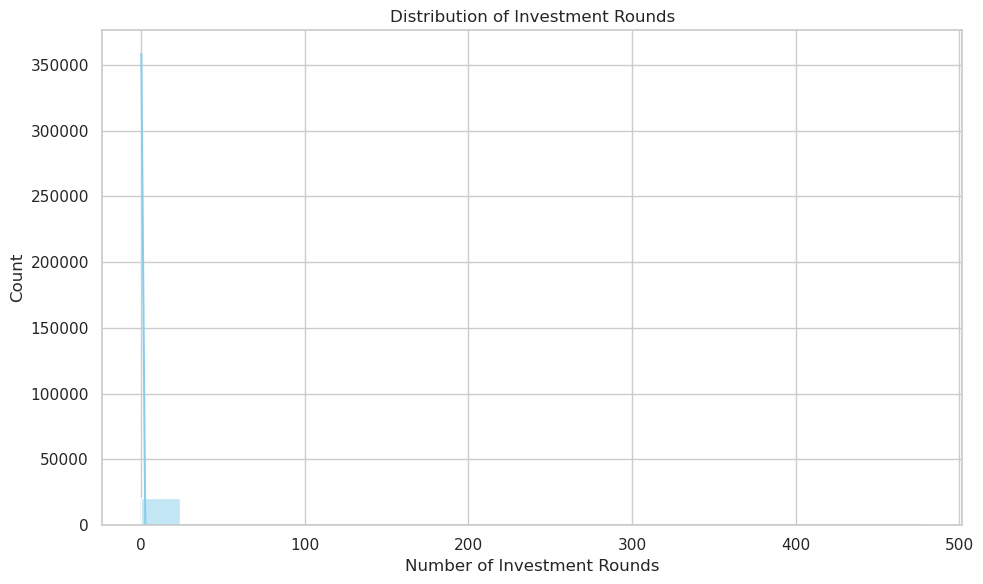

In [219]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='investment_rounds', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Investment Rounds')
plt.xlabel('Number of Investment Rounds')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Box plot of Funding Total by Region


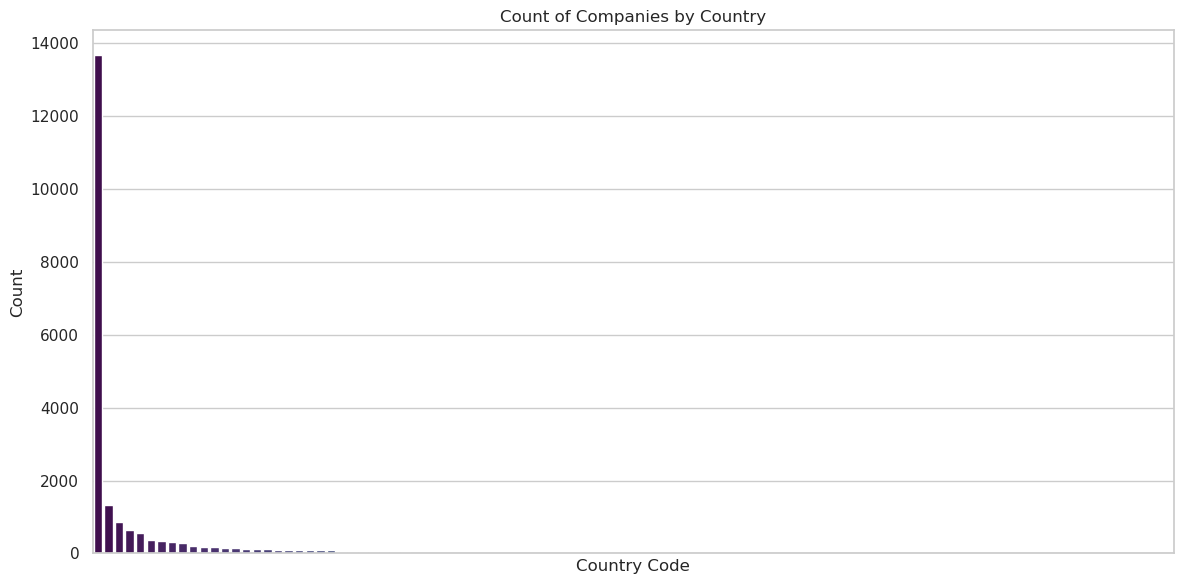

In [224]:
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='country_code', palette='viridis', order=filtered_data['country_code'].value_counts().index)
plt.title('Count of Companies by Country')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks([])  
plt.tight_layout()
plt.show()


### Count of Companies by Country


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/2546688020.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


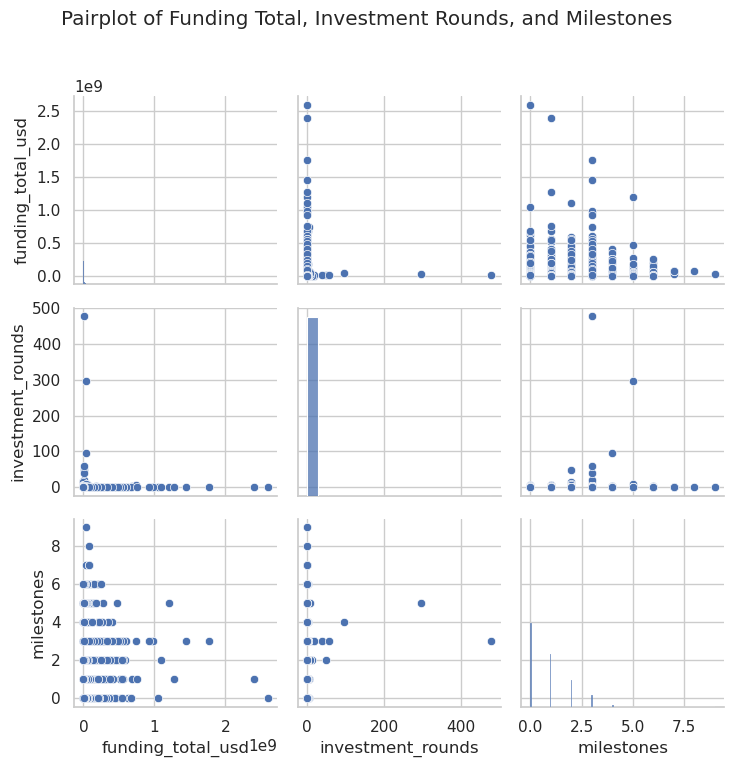

In [227]:
cols_for_pairplot = ['funding_total_usd', 'investment_rounds', 'milestones']
sns.pairplot(filtered_data[cols_for_pairplot])
plt.suptitle('Pairplot of Funding Total, Investment Rounds, and Milestones', y=1.02)
plt.tight_layout()
plt.show()

### Create heatmap


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/1056937261.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


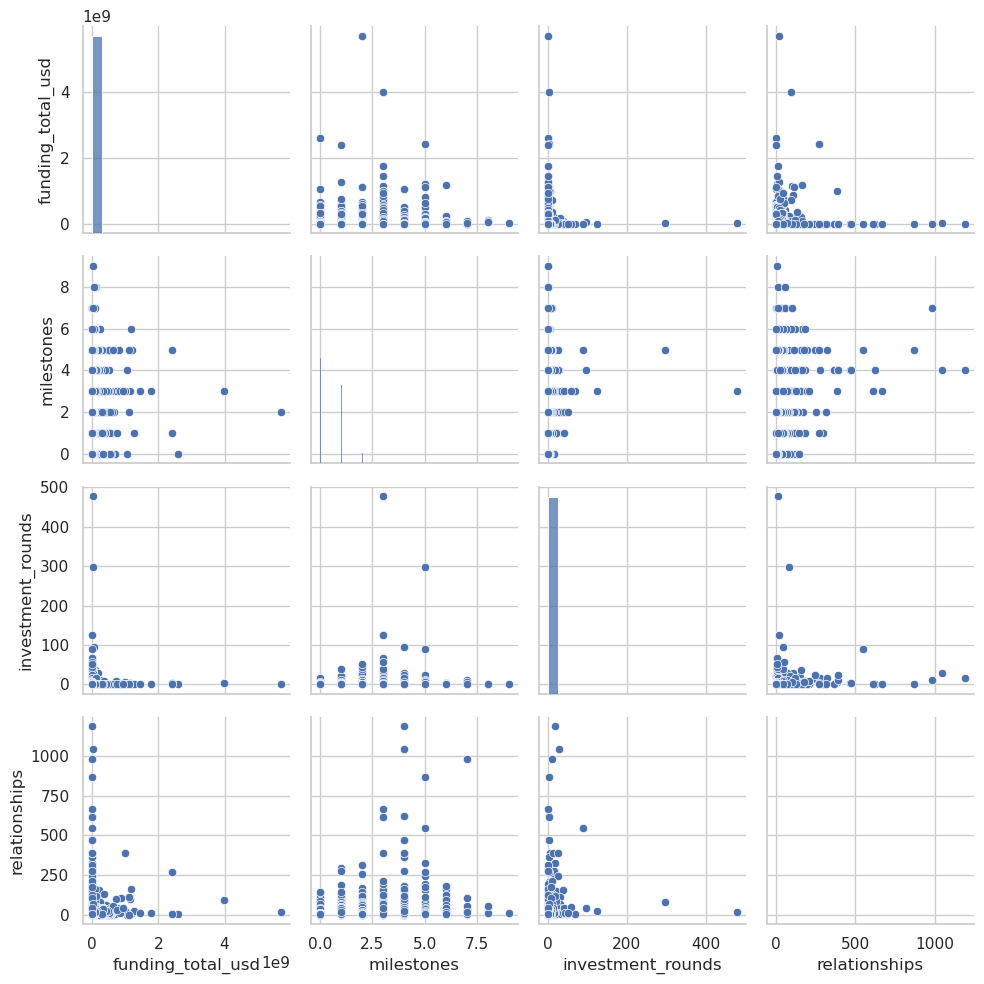

In [231]:
# Select relevant numeric columns
numeric_columns = ['funding_total_usd', 'milestones', 'investment_rounds', 'relationships']

# Create pair plot
sns.pairplot(data=data[numeric_columns])
plt.tight_layout()
plt.show()

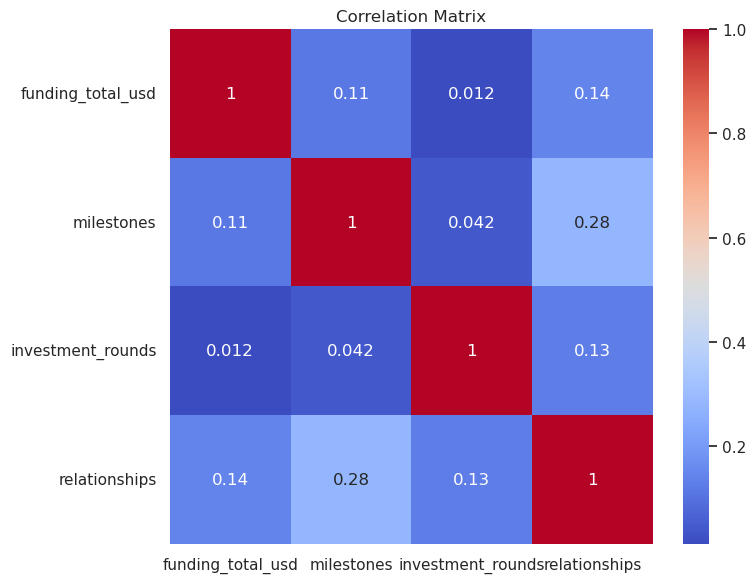

In [232]:
# Calculate correlation matrix
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

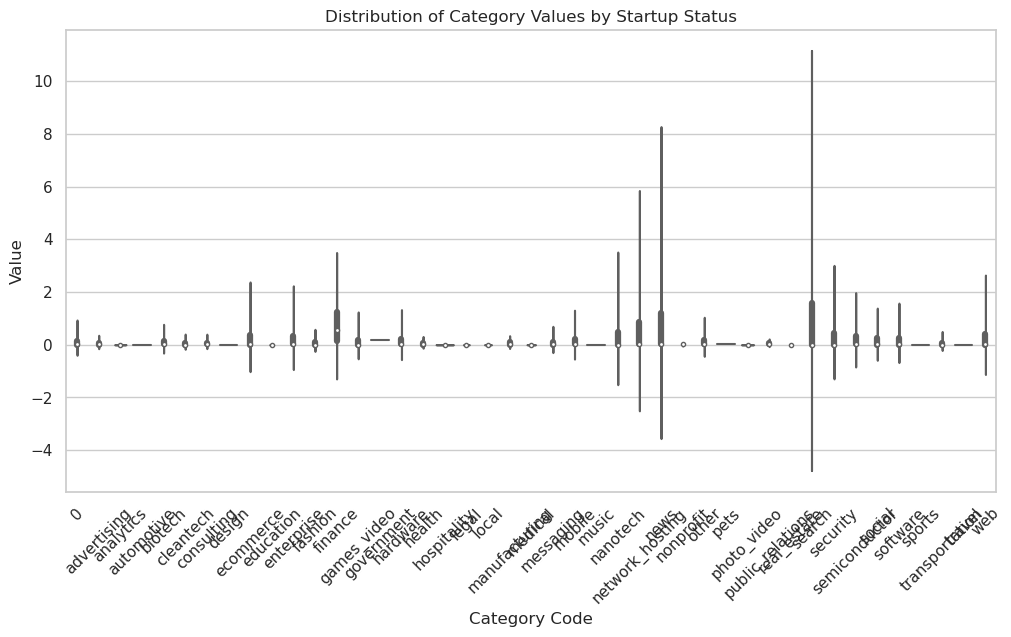

In [233]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=pivot_table, palette="Set3")
plt.title("Distribution of Category Values by Startup Status")
plt.xlabel("Category Code")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

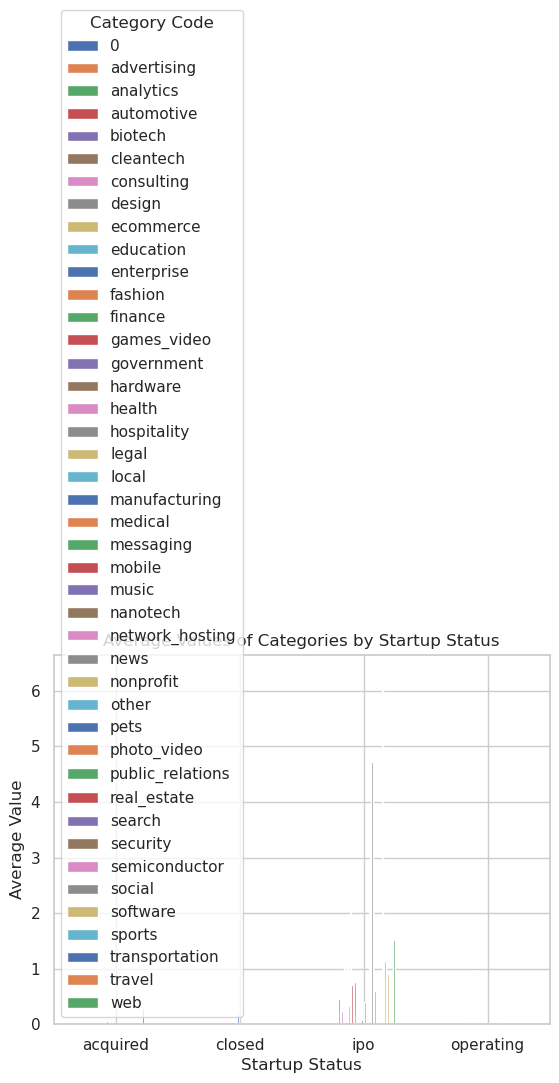

In [235]:
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar')
plt.title("Average Values of Categories by Startup Status")
plt.xlabel("Startup Status")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.legend(title="Category Code")
plt.show()

/tmp/ipykernel_32/2240330178.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


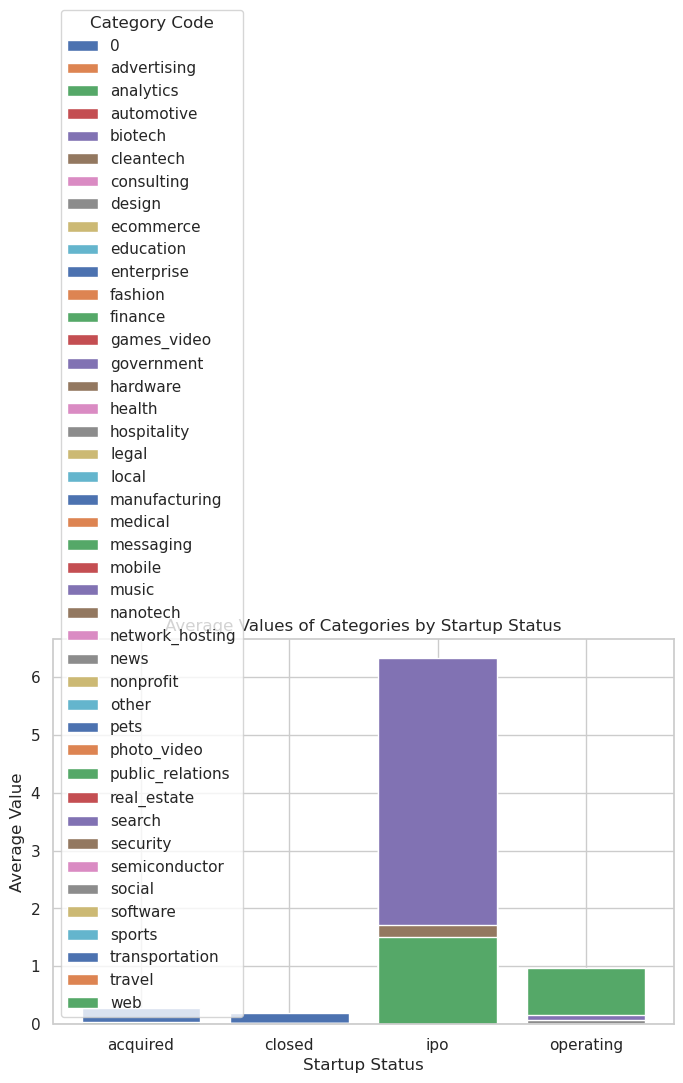

In [237]:
fig, ax = plt.subplots(figsize=(8, 5))
categories = pivot_table.columns
statuses = pivot_table.index

for i, category in enumerate(categories):
    ax.bar(statuses, pivot_table[category], label=category)

ax.set_title("Average Values of Categories by Startup Status")
ax.set_xlabel("Startup Status")
ax.set_ylabel("Average Value")
ax.legend(title="Category Code")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

/tmp/ipykernel_32/370778155.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


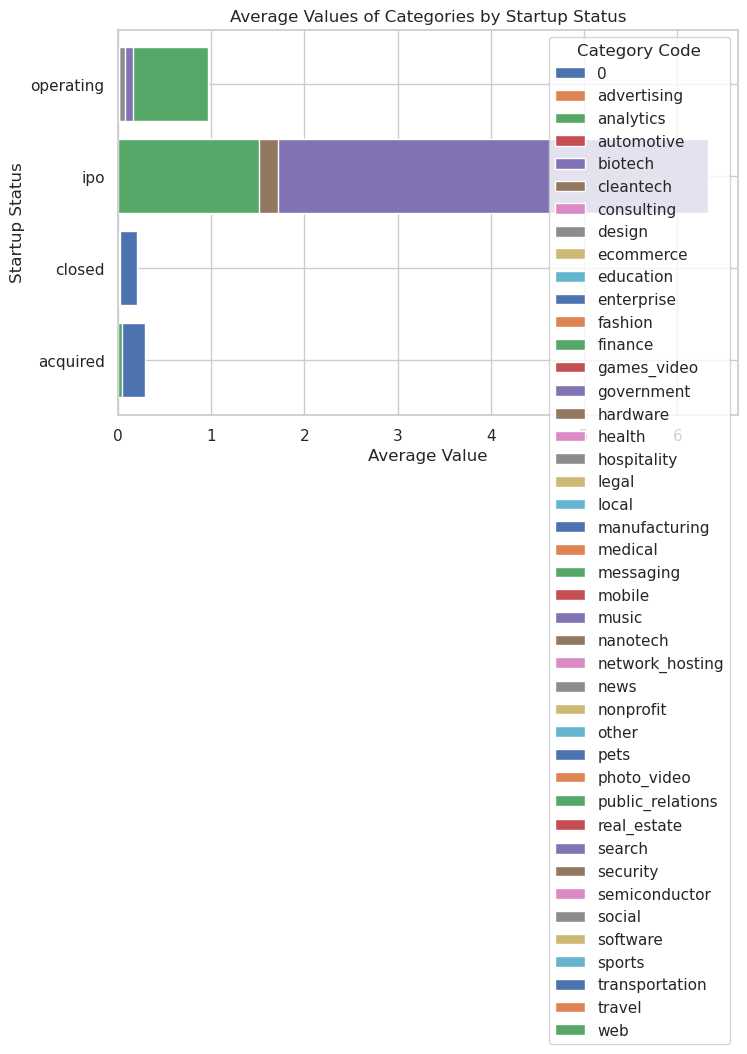

In [238]:
fig, ax = plt.subplots(figsize=(8, 5))
categories = pivot_table.columns
statuses = pivot_table.index

for i, category in enumerate(categories):
    ax.barh(statuses, pivot_table[category], label=category)

ax.set_title("Average Values of Categories by Startup Status")
ax.set_xlabel("Average Value")
ax.set_ylabel("Startup Status")
ax.legend(title="Category Code")
plt.tight_layout()

plt.show()

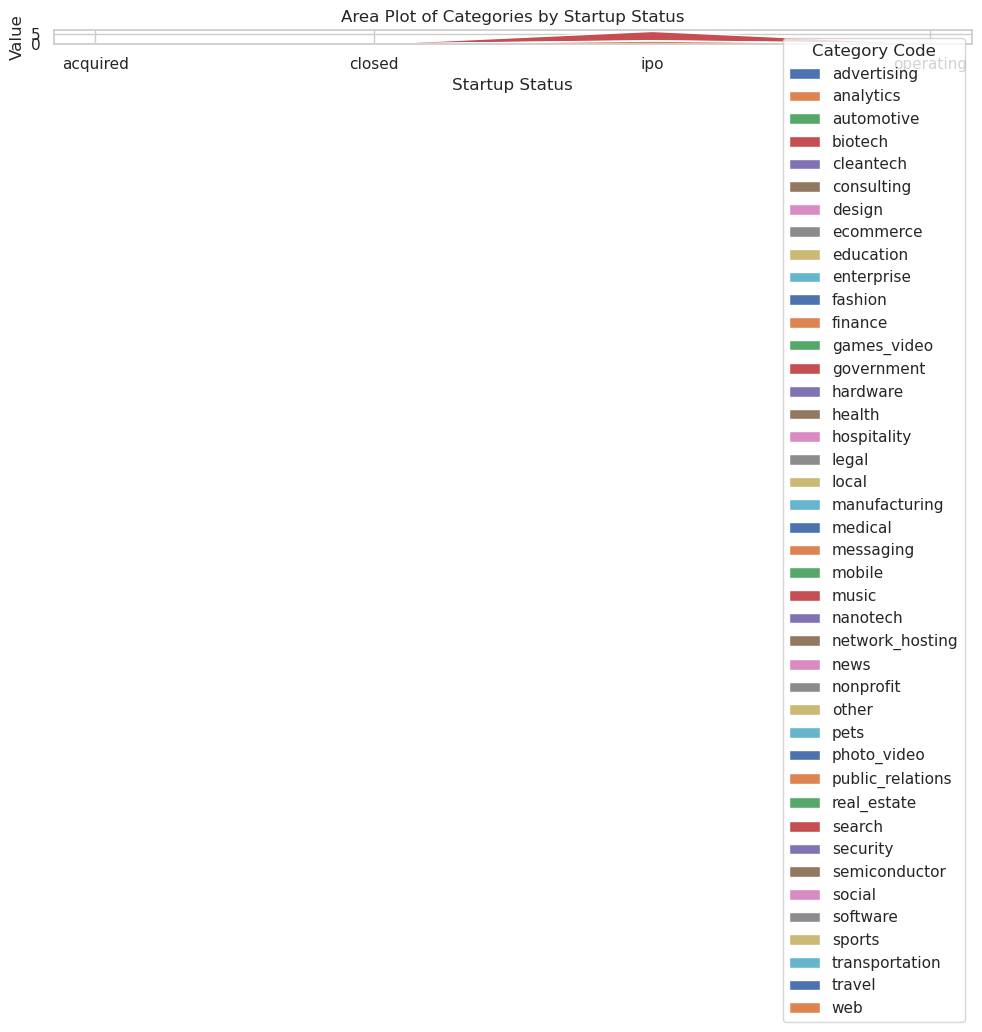

In [239]:
fig, ax = plt.subplots(figsize=(10, 6))
statuses = pivot_table.index
categories = pivot_table.columns[1:]  # Exclude the '0' column

for i, category in enumerate(categories):
    ax.fill_between(statuses, pivot_table[category], label=category)

ax.set_title("Area Plot of Categories by Startup Status")
ax.set_xlabel("Startup Status")
ax.set_ylabel("Value")
ax.legend(title="Category Code")
plt.tight_layout()

plt.show()


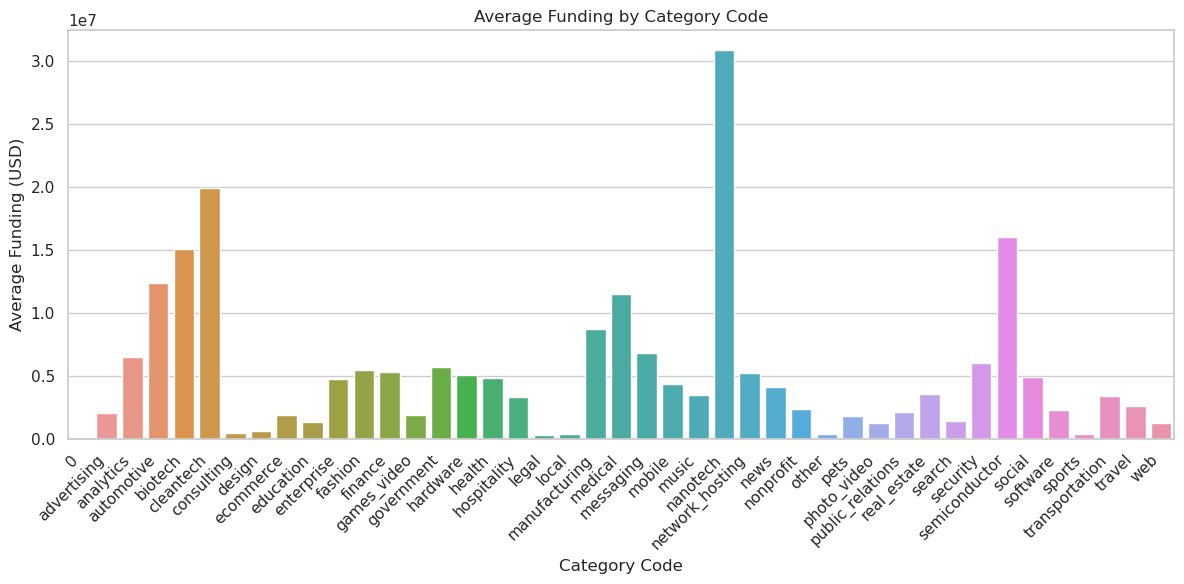

In [241]:
# Group by category_code and calculate average funding
average_funding_by_category = data.groupby('category_code')['funding_total_usd'].mean().reset_index()

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=average_funding_by_category, x='category_code', y='funding_total_usd')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category Code')
plt.ylabel('Average Funding (USD)')
plt.title('Average Funding by Category Code')
plt.tight_layout()
plt.show()

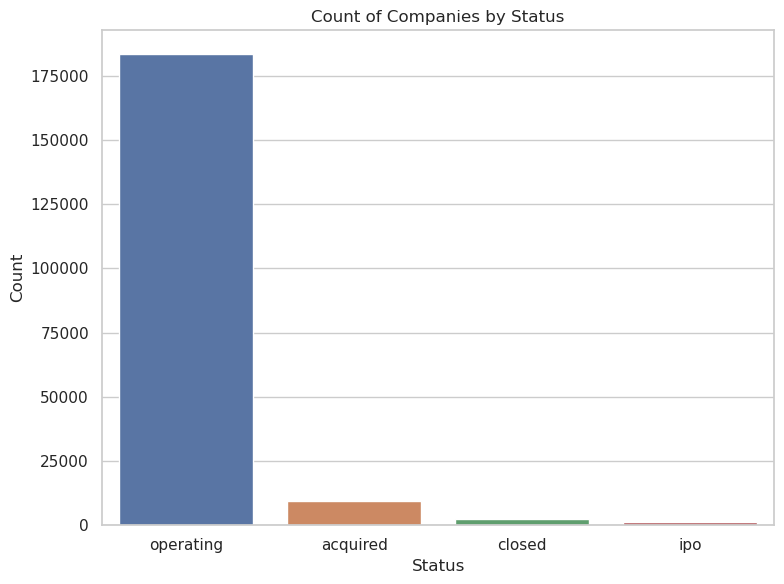

In [243]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Companies by Status')
plt.tight_layout()
plt.show()

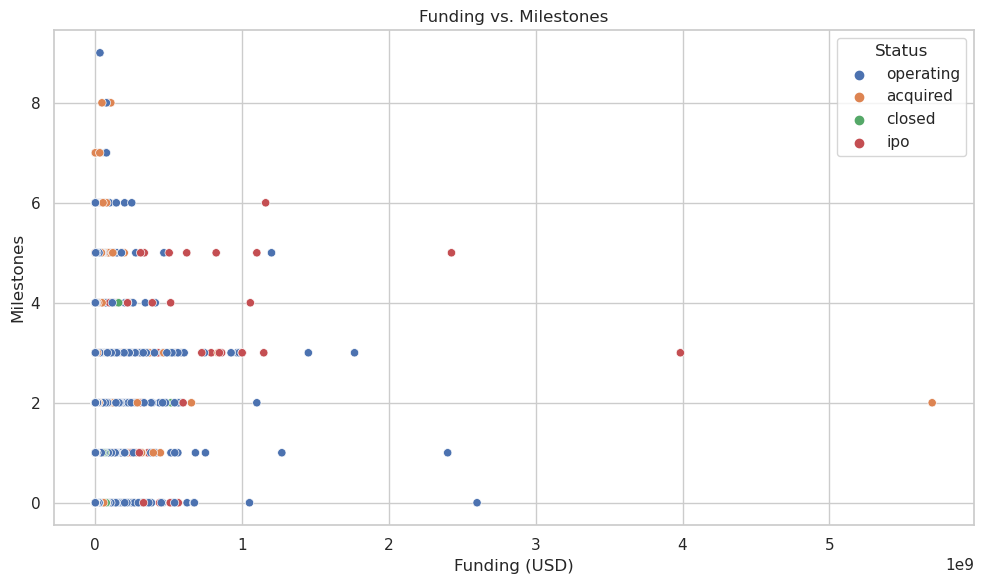

In [245]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='funding_total_usd', y='milestones', hue='status')
plt.xlabel('Funding (USD)')
plt.ylabel('Milestones')
plt.title('Funding vs. Milestones')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

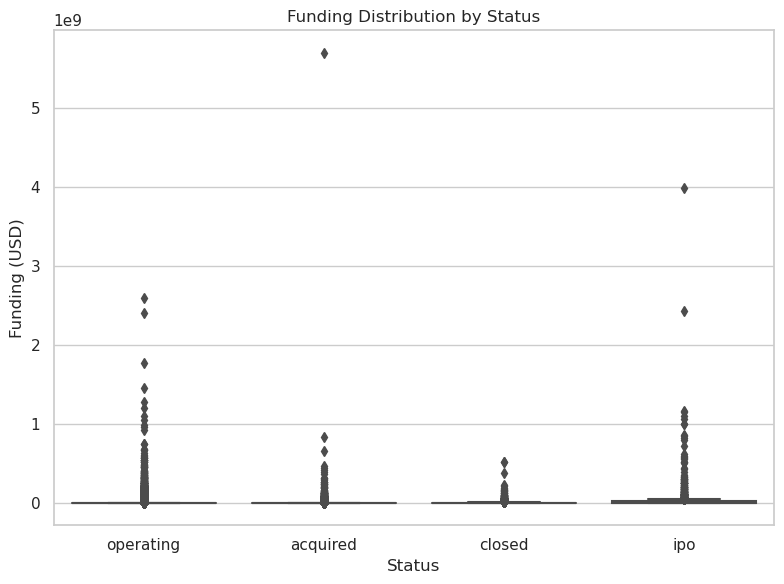

In [246]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='status', y='funding_total_usd')
plt.xlabel('Status')
plt.ylabel('Funding (USD)')
plt.title('Funding Distribution by Status')
plt.tight_layout()
plt.show()

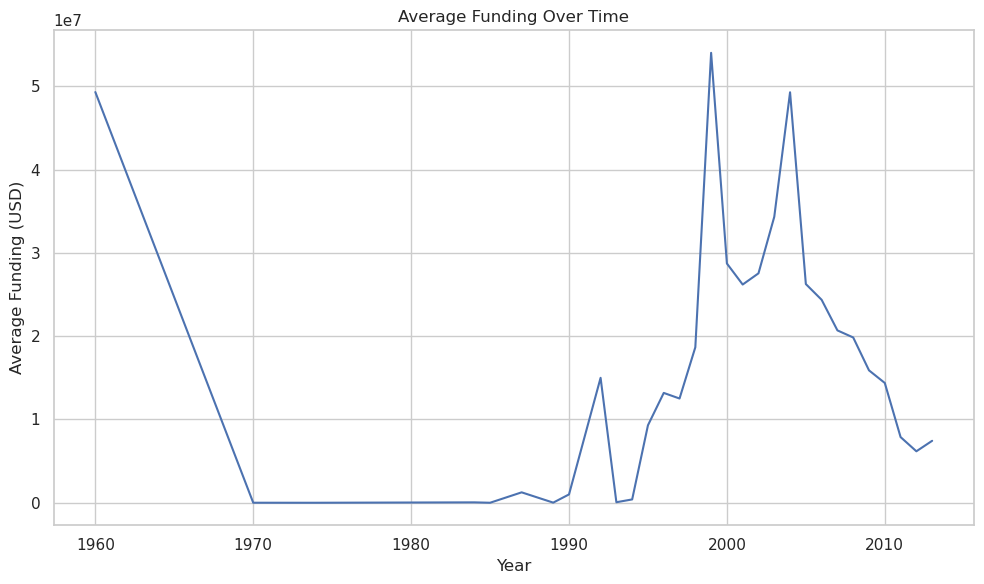

In [248]:
# Convert 'first_funding_at' to datetime format
data['first_funding_at'] = pd.to_datetime(data['first_funding_at'], errors='coerce')

# Extract year from 'first_funding_at'
data['funding_year'] = data['first_funding_at'].dt.year

# Calculate average funding per year
average_funding_by_year = data.groupby('funding_year')['funding_total_usd'].mean().reset_index()

# Create line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_funding_by_year, x='funding_year', y='funding_total_usd')
plt.xlabel('Year')
plt.ylabel('Average Funding (USD)')
plt.title('Average Funding Over Time')
plt.tight_layout()
plt.show()